In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
df = pd.read_csv("person_knows_person.csv")

In [4]:
df.head()

Person.id|Person.id
0              38|956
1              38|962
2              38|941
3               38|74
4               38|36

## Getting pairs and nodes

In [5]:
edges = [text.split("|") for text in df['Person.id|Person.id']]
pairs = [(int(edge[0]),int(edge[1])) for edge in edges]
df['edges'] = pairs
nodes = [int(pair[0]) for pair in df['edges']]
df['nodes'] = nodes

In [6]:
df.head()

Person.id|Person.id      edges  nodes
0              38|956  (38, 956)     38
1              38|962  (38, 962)     38
2              38|941  (38, 941)     38
3               38|74   (38, 74)     38
4               38|36   (38, 36)     38

## Plotting the Graph

998
14895


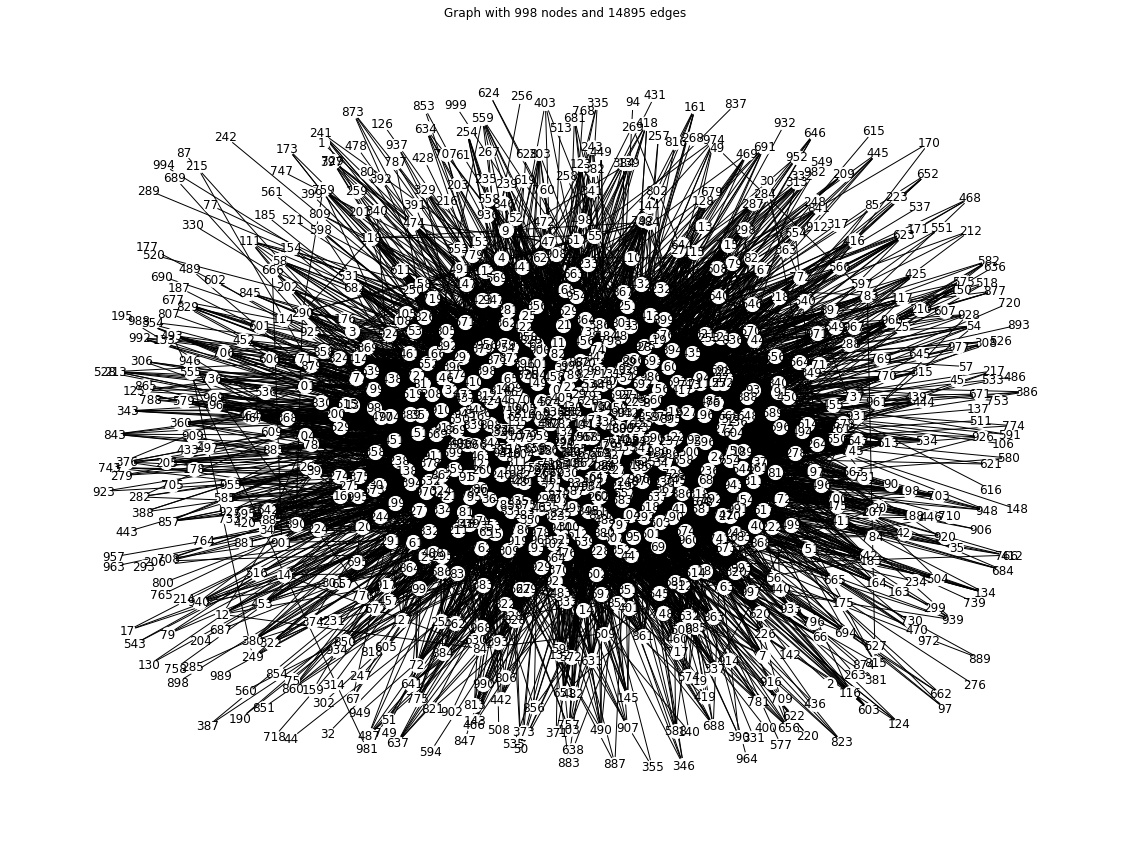

In [16]:
import networkx as nx
import networkx.algorithms.tree as tree

graph = nx.Graph()
graph.add_nodes_from(df['nodes'])

# Add edge to the graph
graph.add_edges_from(pairs)
print(graph.number_of_nodes())
print(graph.number_of_edges())
plt.figure(figsize=(20,15))
pos=nx.spring_layout(graph,k=0.2, iterations=10)
plt.title(f"Graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges")
nx.draw(graph,pos ,with_labels = True, node_color='white',node_size=200)

## Dijkstra and A* to find the shortest path in the graph.

### Dijkstra

Dijkstra to find the shortest path in the graph.

In [26]:
# Using the visualization from above to run Dikstra between two nodes
print(nx.dijkstra_path(graph,10,242)) 
print(nx.dijkstra_path(graph,21,932))

[10, 232, 405, 379, 242]
[21, 480, 942, 932]


In [27]:
# For the edges 
path = nx.dijkstra_path(graph,10,242)
short_p = []
for i in range(0,len(path)-1):
    short_p.append((path[i],path[i+1]))
short_p

[(10, 232), (232, 405), (405, 379), (379, 242)]

In [59]:
# This will give us all the shortest paths from node 10 using the weights from the edges.
print(nx.shortest_path(graph, source=10,weight='weight'))

{10: [10], 232: [10, 232], 928: [10, 928], 532: [10, 532], 970: [10, 970], 900: [10, 900], 88: [10, 88], 685: [10, 685], 945: [10, 945], 510: [10, 510], 13: [10, 13], 83: [10, 83], 319: [10, 319], 938: [10, 938], 951: [10, 951], 5: [10, 5], 445: [10, 445], 11: [10, 11], 960: [10, 960], 767: [10, 767], 943: [10, 943], 987: [10, 987], 973: [10, 973], 64: [10, 64], 41: [10, 41], 155: [10, 155], 913: [10, 913], 702: [10, 702], 84: [10, 84], 15: [10, 15], 539: [10, 539], 974: [10, 974], 484: [10, 484], 482: [10, 482], 474: [10, 474], 104: [10, 104], 931: [10, 931], 924: [10, 924], 930: [10, 930], 962: [10, 962], 933: [10, 933], 74: [10, 74], 805: [10, 805], 947: [10, 947], 6: [10, 6], 158: [10, 158], 46: [10, 46], 18: [10, 18], 801: [10, 801], 40: [10, 40], 227: [10, 227], 425: [10, 425], 403: [10, 403], 29: [10, 29], 620: [10, 620], 245: [10, 245], 558: [10, 558], 230: [10, 230], 477: [10, 477], 405: [10, 232, 405], 514: [10, 232, 514], 838: [10, 232, 838], 667: [10, 232, 667], 629: [10, 2

In [56]:
# This will give us the length of the shortest path from node 10 to node 242.
print(nx.shortest_path_length(graph, source=10, target=242, weight='weight'))

4


In [80]:
df["nodes"].max()

999

In [143]:
#The shortest path between first 100 node using Dijkstra

from itertools import combinations

nodelist = list(range(0, 100))
paths = {}
for nodes in combinations(nodelist, r=2):
    paths[nodes] = nx.dijkstra_path(graph, *nodes)


Shortest = min([len(paths[path]) for path in paths])
res = []
for path in paths:
    if len(paths[path]) == Shortest:
        res.append(path)
          
print("Nodes with shortest path among first 100 nodes using Dijkstra : " + str(res) +
      " with lenght : " + str(len(paths[res[0]])-1) )

Nodes with shortest path among first 100 nodes using Dijkstra : [(0, 21), (0, 22), (0, 23), (0, 62), (0, 68), (3, 4), (3, 5), (3, 6), (3, 34), (3, 40), (3, 70), (3, 74), (4, 5), (4, 6), (4, 34), (4, 38), (4, 46), (4, 55), (4, 70), (5, 6), (5, 10), (5, 16), (5, 18), (5, 29), (5, 31), (5, 33), (5, 40), (5, 41), (5, 43), (5, 46), (5, 55), (5, 64), (5, 72), (5, 74), (5, 83), (6, 10), (6, 15), (6, 20), (6, 23), (6, 38), (6, 46), (6, 47), (6, 55), (6, 59), (6, 67), (6, 69), (6, 70), (6, 74), (6, 84), (6, 98), (8, 24), (8, 28), (8, 60), (8, 70), (8, 81), (10, 11), (10, 13), (10, 15), (10, 18), (10, 29), (10, 40), (10, 41), (10, 46), (10, 64), (10, 74), (10, 83), (10, 84), (10, 88), (11, 13), (11, 83), (11, 88), (11, 91), (11, 92), (12, 13), (12, 83), (12, 84), (13, 15), (13, 84), (13, 89), (14, 83), (14, 84), (15, 16), (15, 26), (15, 34), (15, 46), (15, 60), (15, 65), (15, 70), (15, 83), (15, 91), (15, 92), (16, 18), (16, 29), (16, 33), (16, 36), (16, 43), (18, 20), (18, 40), (20, 24), (20, 7

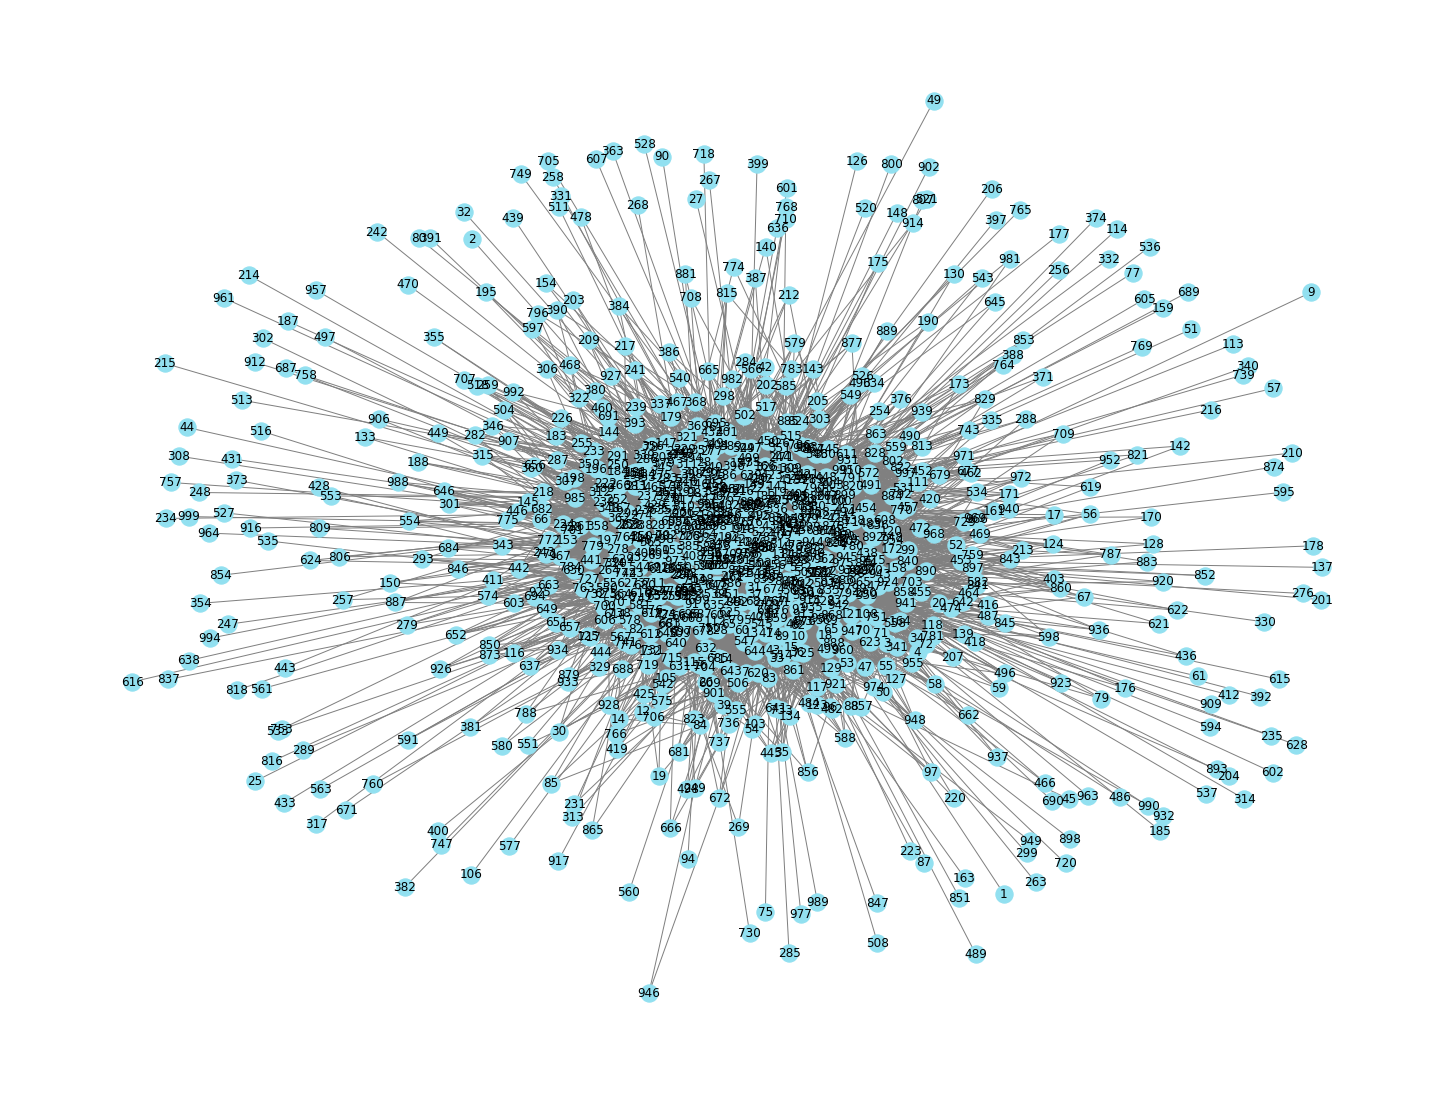

In [69]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels = True, edge_color='grey',node_color="#92e0f0")

### A*

In [64]:
print(nx.astar_path(graph, 10, 242, weight="weight"))
print(nx.astar_path_length(graph, 10, 242, weight="weight"))

[10, 232, 405, 379, 242]
4


In [65]:
print(nx.astar_path(graph, 10, 242, weight="cost"))
print(nx.astar_path_length(graph, 10, 242, weight="cost"))

[10, 232, 405, 379, 242]
4


In [142]:
#The shortest path between first 100 node using A*

from itertools import combinations

nodelist = list(range(0, 100))
paths = {}
for nodes in combinations(nodelist, r=2):
    paths[nodes] = nx.astar_path(graph, *nodes)

print(paths)


Shortest = min([len(paths[path]) for path in paths])
res = []
for path in paths:
    if len(paths[path]) == Shortest:
        res.append(path)
          
print("Nodes with shortest path among first 100 nodes using A* shortest paths : " + str(res) +
      " with lenght : " + str(len(paths[res[0]])-1) )

{(0, 1): [0, 980, 1], (0, 2): [0, 992, 296, 2], (0, 3): [0, 319, 3], (0, 4): [0, 980, 4], (0, 5): [0, 227, 5], (0, 6): [0, 319, 6], (0, 7): [0, 227, 7], (0, 8): [0, 262, 8], (0, 9): [0, 225, 971, 9], (0, 10): [0, 319, 10], (0, 11): [0, 402, 11], (0, 12): [0, 405, 838, 12], (0, 13): [0, 712, 13], (0, 14): [0, 194, 14], (0, 15): [0, 227, 15], (0, 16): [0, 319, 16], (0, 17): [0, 405, 562, 17], (0, 18): [0, 905, 18], (0, 19): [0, 915, 19], (0, 20): [0, 894, 20], (0, 21): [0, 21], (0, 22): [0, 22], (0, 23): [0, 23], (0, 24): [0, 910, 24], (0, 25): [0, 262, 626, 25], (0, 26): [0, 23, 26], (0, 27): [0, 405, 377, 27], (0, 28): [0, 318, 28], (0, 29): [0, 319, 29], (0, 30): [0, 264, 30], (0, 31): [0, 319, 31], (0, 32): [0, 407, 32], (0, 33): [0, 318, 33], (0, 34): [0, 930, 34], (0, 35): [0, 23, 35], (0, 36): [0, 62, 36], (0, 37): [0, 530, 37], (0, 38): [0, 915, 38], (0, 39): [0, 23, 39], (0, 40): [0, 319, 40], (0, 41): [0, 318, 41], (0, 42): [0, 825, 434, 42], (0, 43): [0, 273, 43], (0, 44): [0,

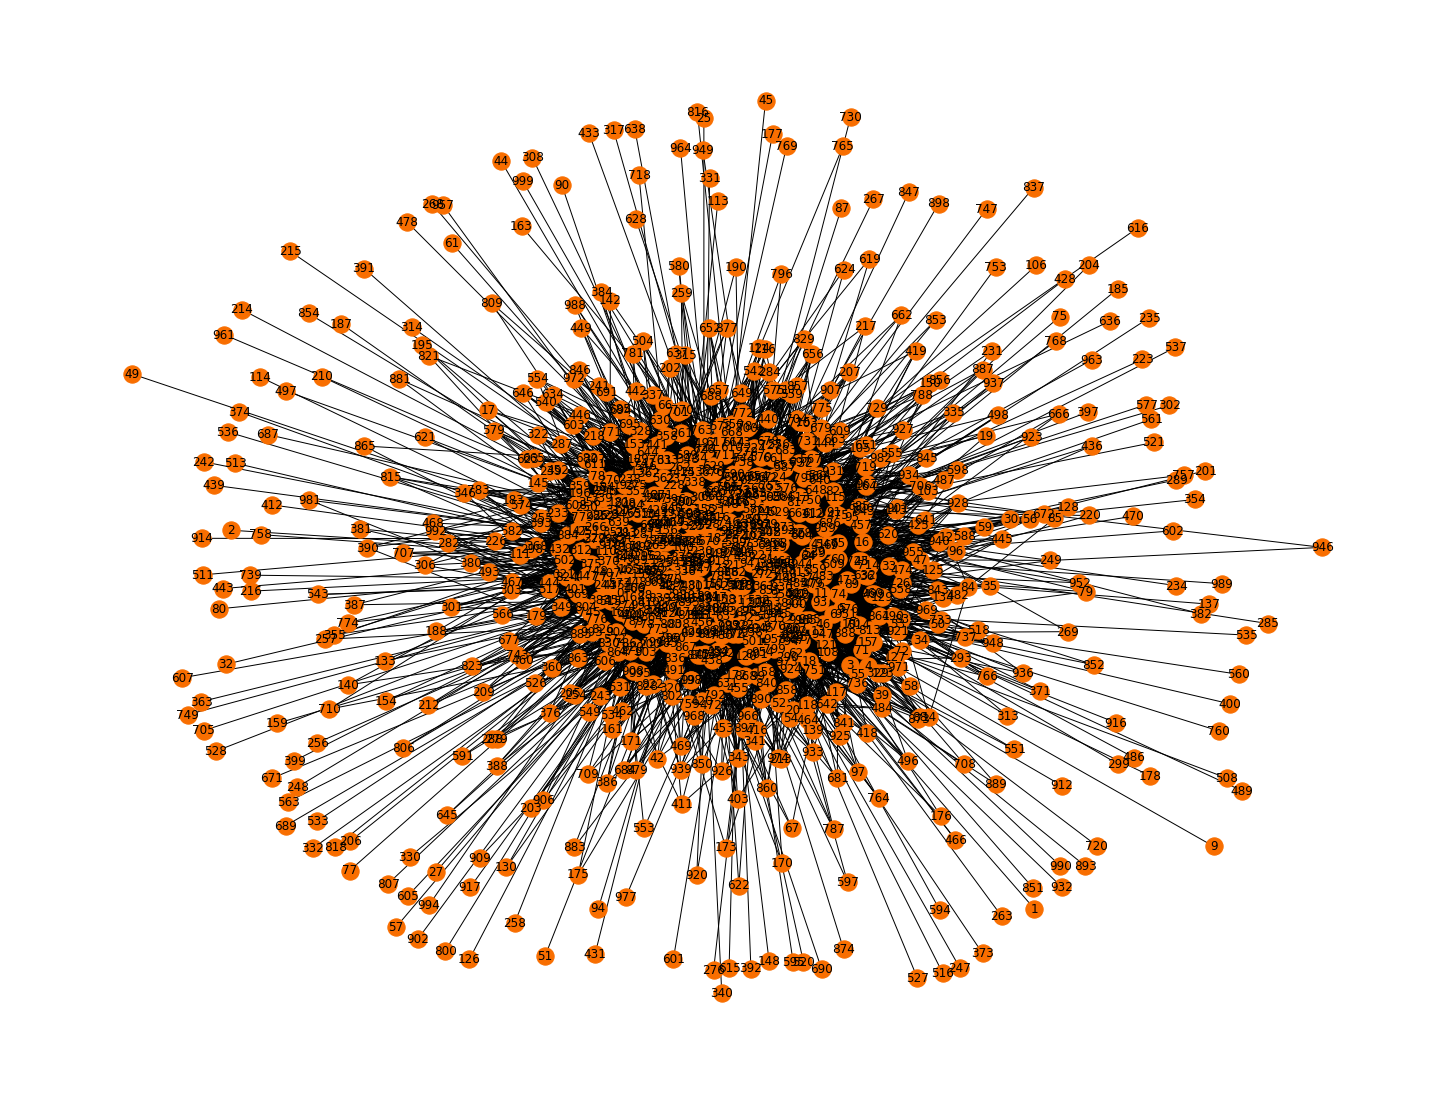

In [83]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = True, node_color="#f86e00")
edge_labels = nx.get_edge_attributes(graph, "cost")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.show()

## Prim and Kruskal to find the MST from two arbitrary nodes one will be source one node will be target

### Prim Algorithm

In [93]:
mst = tree.minimum_spanning_edges(graph, algorithm='prim', data=False)
edgelist = list(mst)

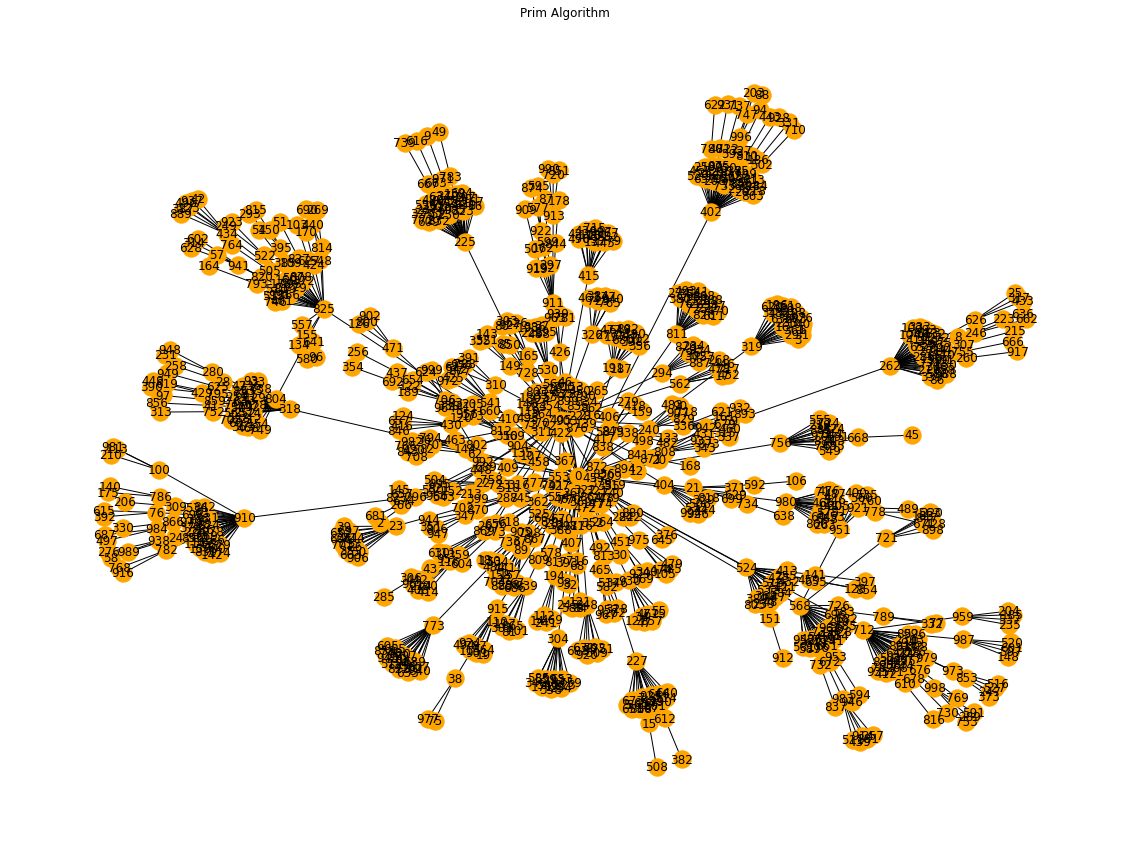

In [94]:
plt.figure(figsize=(20,15))
graph_prim = nx.Graph()
graph_prim.add_edges_from(edgelist)
plt.title("Prim Algorithm")
nx.draw(graph_prim, with_labels = True, node_color='orange')

### Kruskal Algorithm

In [92]:
# Kruskal Algorithm
k_tree = tree.minimum_spanning_edges(graph, algorithm="kruskal",data=False)
edgelist = list(k_tree)

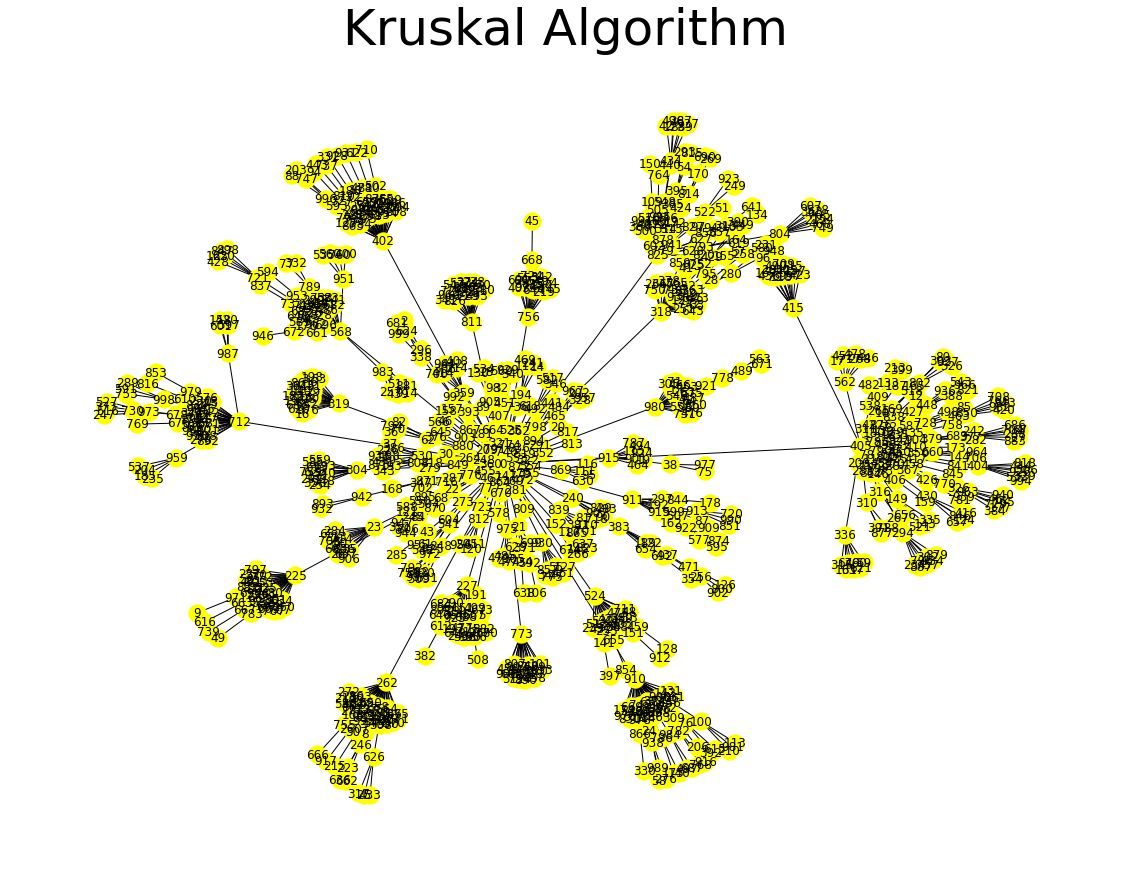

In [95]:
plt.figure(figsize=(20,15))
graph_k = nx.Graph()
graph_k.add_edges_from(edgelist)
plt.title("Kruskal Algorithm", fontdict = {'fontsize' : 50})
nx.draw(graph_k, with_labels = True, node_color='yellow')

## Page rank and HITS algorithm to order the graph nodes based on their importance. Again, if the graph is too large for your system you can made a smaller file and use a subgraph. (4 points)

### Page Rank

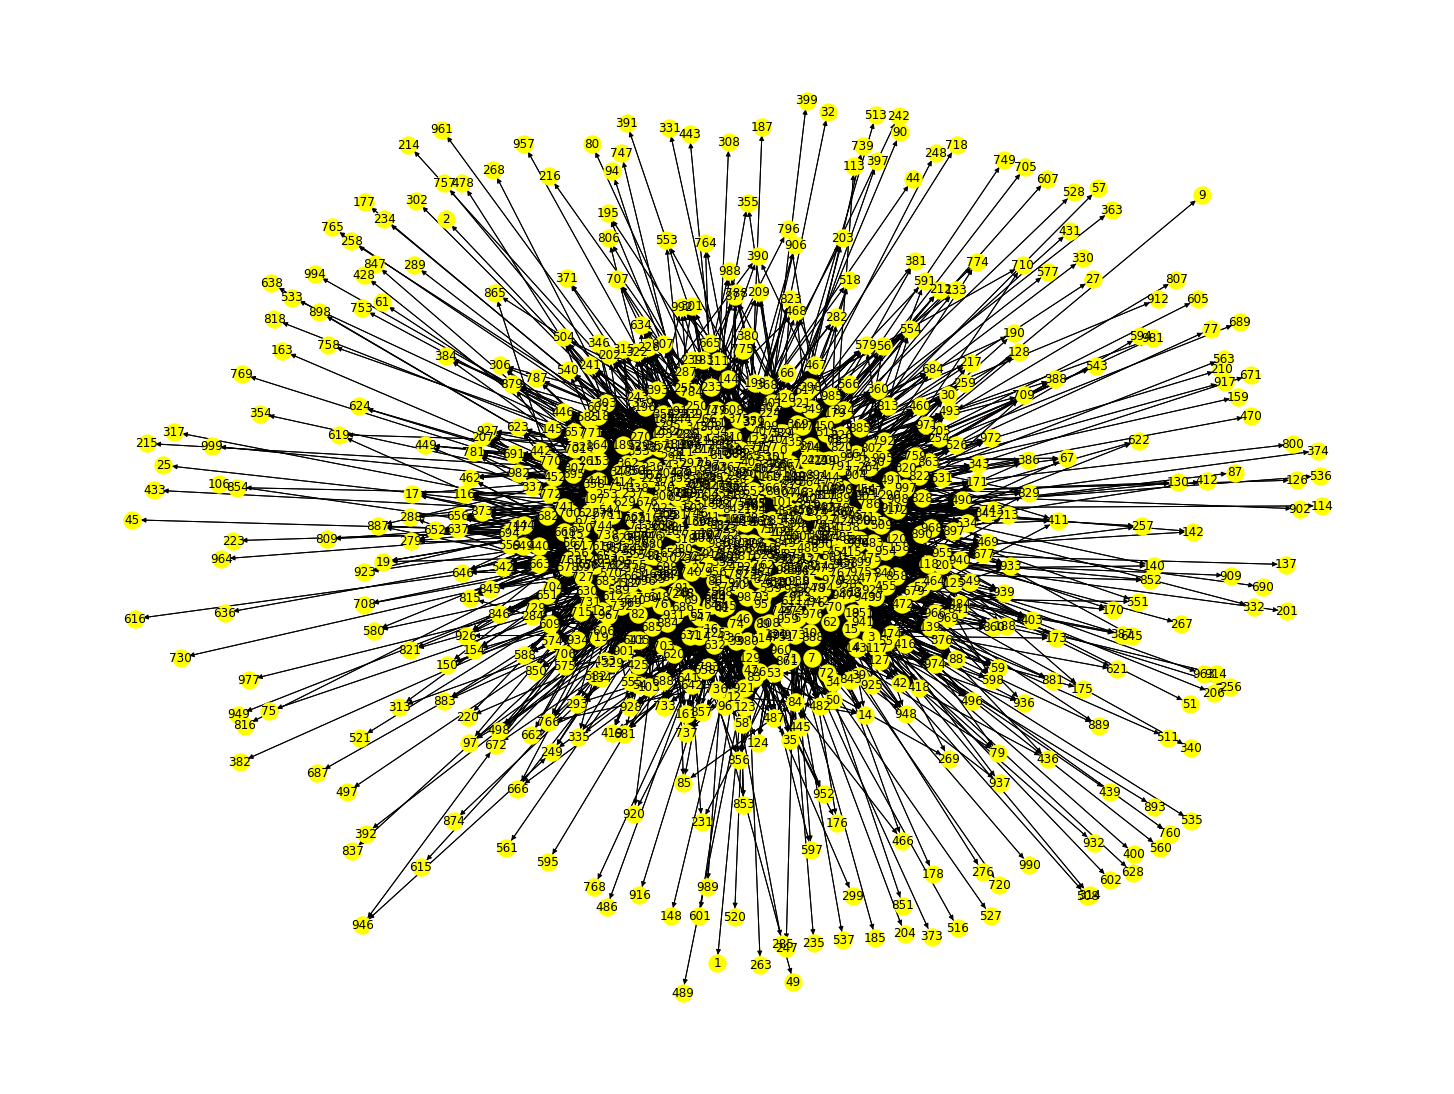

In [100]:
plt.figure(figsize=(20,15))
graph_page = nx.DiGraph()
graph_page.add_edges_from(pairs)
nx.draw(graph_page, with_labels = True, node_color='yellow')

In [118]:
pr = nx.pagerank(graph_page, alpha=0.4)
sorted(pr.items(), key=operator.itemgetter(1), reverse=True)[:10]

[(959, 0.003525074560318856),
 (804, 0.0033042240260900365),
 (973, 0.0030729610867317905),
 (471, 0.0030287925256273335),
 (983, 0.0029005937319331824),
 (721, 0.0028684368184805228),
 (987, 0.002686761649887032),
 (404, 0.002612180255661144),
 (938, 0.002570243540743837),
 (294, 0.00254934676744868)]

### HITS

authority score 

{38: 0.0019452257130474966, 956: 0.001297562212432778, 962: 0.0021993553776045675, 941: 0.0017645735745678531, 74: 0.0013628980507865128, 36: 0.0011273428023101774, 53: 0.0005725682882043707, 48: 0.0015150894480663699, 29: 0.001580840167295794, 46: 0.0014481955635213685, 40: 0.002279306526194333, 60: 0.0016680034959347548, 31: 0.0023965866328850218, 41: 0.0016193454414530999, 6: 0.001388183973179322, 4: 0.0005949331860700515, 547: 0.0012127747855245825, 832: 0.001256252116913126, 129: 0.0006862367082299465, 915: 0.0016103834140719692, 921: 0.0008397165750773924, 507: 0.002141196371212269, 501: 0.0014330536785153582, 839: 0.0021382779194195076, 99: 0.0008089049809238012, 452: 0.00029704950468011445, 457: 0.000655215223883994, 453: 0.0003139769102718649, 131: 0.002462624667222775, 462: 0.00018496045238433547, 416: 0.0003338521540659887, 414: 0.0008945278101926415, 417: 0.0023517179196132646, 415: 0.002148643460788869, 109: 0.0027431136274237377, 119: 0.00218400550241401

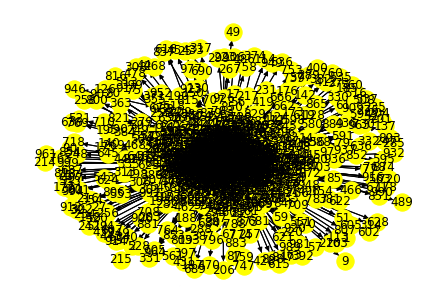

In [120]:
G = nx.DiGraph()
G.add_edges_from(pairs)
nx.draw(G, with_labels = True, node_color='yellow')
hits = nx.hits(G, max_iter = 50, normalized = True)
h,a = hits
print('authority score \n')
print(a)
print('hub score \n')
print(h)

In [121]:
print("Top 10 authority score \n")
sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:10]

Top 10 authority score 



[(366, 0.0033577279030231754),
 (316, 0.003331769106028433),
 (811, 0.0033095727389928),
 (385, 0.003295087217921508),
 (107, 0.0032214384987164567),
 (819, 0.0032031312612819285),
 (918, 0.0031798646754255264),
 (402, 0.0031652177981302677),
 (240, 0.0031622636114759057),
 (165, 0.0031603000998465473)]

In [122]:
print("Top 10 hub score \n")
sorted(h.items(), key=operator.itemgetter(1), reverse=True)[:10]

Top 10 hub score 



[(366, 0.0033577279030231767),
 (316, 0.003331769106028434),
 (811, 0.003309572738992802),
 (385, 0.003295087217921509),
 (107, 0.0032214384987164575),
 (819, 0.003203131261281929),
 (918, 0.003179864675425525),
 (402, 0.003165217798130269),
 (240, 0.003162263611475906),
 (165, 0.0031603000998465486)]

## Louvain or Leiden for community detection (2 points), and visualize the result (5 points).

### Louvain

In [124]:
import community as community_louvain

# retrun partition as a dict
partition = community_louvain.best_partition(graph)
print(partition)

{38: 3, 534: 1, 941: 3, 347: 2, 303: 4, 977: 3, 495: 0, 75: 3, 884: 2, 540: 0, 336: 2, 405: 2, 688: 0, 135: 2, 587: 4, 59: 3, 863: 1, 621: 3, 314: 3, 628: 3, 43: 3, 875: 0, 139: 3, 861: 3, 498: 3, 422: 3, 285: 3, 514: 3, 746: 4, 728: 4, 50: 0, 548: 4, 602: 3, 825: 1, 402: 2, 109: 1, 557: 4, 72: 3, 627: 4, 416: 0, 758: 2, 790: 1, 463: 1, 838: 1, 65: 2, 357: 2, 52: 3, 982: 2, 766: 3, 708: 1, 427: 0, 193: 2, 707: 2, 667: 0, 559: 2, 12: 3, 629: 4, 232: 2, 992: 1, 186: 2, 216: 2, 197: 2, 585: 2, 739: 0, 388: 0, 928: 0, 429: 2, 28: 0, 732: 4, 258: 0, 331: 2, 318: 2, 635: 4, 988: 2, 393: 2, 654: 4, 105: 4, 659: 2, 189: 2, 837: 4, 643: 4, 150: 4, 668: 4, 556: 4, 383: 1, 532: 3, 326: 2, 45: 4, 970: 3, 717: 4, 900: 3, 910: 1, 940: 0, 598: 3, 765: 2, 877: 2, 239: 2, 524: 2, 384: 2, 396: 2, 224: 2, 177: 2, 795: 4, 619: 2, 262: 2, 91: 4, 711: 4, 308: 2, 536: 1, 579: 2, 513: 2, 348: 2, 153: 1, 419: 4, 663: 2, 887: 2, 374: 1, 616: 2, 996: 1, 473: 0, 415: 1, 88: 3, 518: 0, 842: 1, 762: 1, 44: 2, 603: 

In [125]:
sorted(partition.items(), key=operator.itemgetter(1), reverse=True)[:10]

[(303, 4),
 (587, 4),
 (746, 4),
 (728, 4),
 (548, 4),
 (557, 4),
 (627, 4),
 (629, 4),
 (732, 4),
 (635, 4)]

In [126]:
from collections import Counter
res = Counter(partition.values())
print(res)

Counter({2: 310, 1: 207, 4: 199, 3: 164, 0: 118})


In [127]:
G = nx.Graph()
G.add_nodes_from(df['nodes'])
# add edge to the graph
G.add_edges_from(pairs)

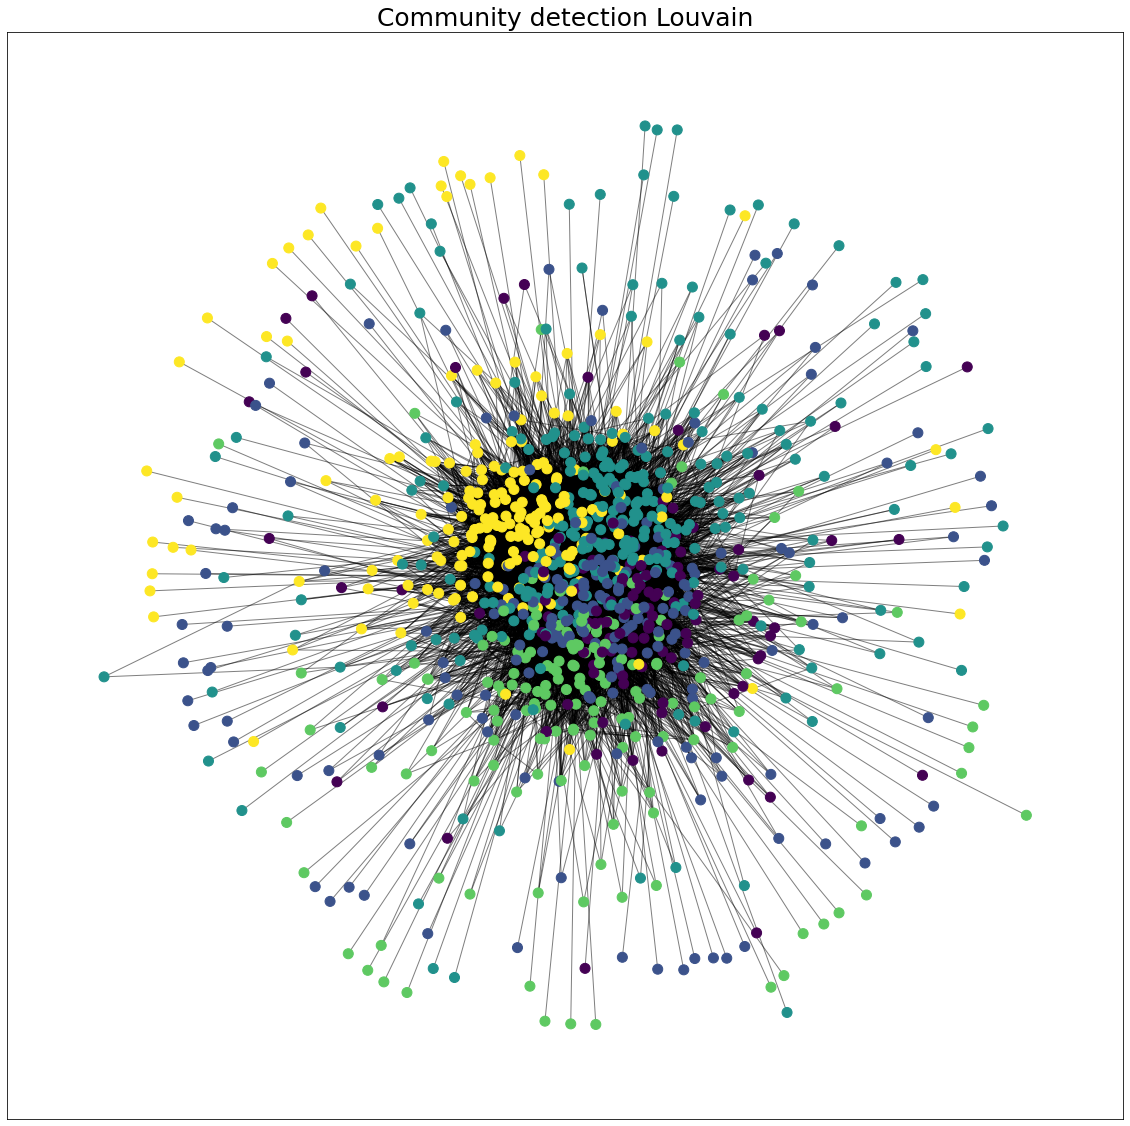

In [134]:
# visualization
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),node_size=100,node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, label=True)
plt.title("Community detection Louvain", fontdict = {'fontsize' : 25 })
plt.show()

### Leiden

In [135]:
import igraph as ig
import leidenalg as la
G = ig.Graph(pairs)
partition = la.find_partition(G ,la.ModularityVertexPartition)
print(partition)

Clustering with 1000 elements and 7 clusters
[0] 1, 17, 19, 25, 45, 49, 61, 76, 82, 97, 103, 105, 106, 115, 116, 132, 148,
    150, 163, 263, 268, 299, 317, 354, 382, 392, 412, 428, 433, 439, 441, 442,
    444, 445, 446, 468, 478, 486, 497, 504, 506, 511, 520, 541, 542, 544, 545,
    548, 550, 556, 557, 562, 565, 567, 568, 569, 570, 571, 574, 575, 576, 578,
    581, 583, 584, 586, 587, 588, 589, 590, 592, 593, 596, 601, 603, 606, 608,
    609, 610, 612, 614, 615, 617, 618, 619, 624, 625, 626, 627, 629, 630, 631,
    633, 634, 635, 637, 638, 640, 641, 642, 643, 644, 646, 647, 648, 649, 650,
    652, 653, 654, 655, 656, 657, 658, 660, 661, 664, 666, 668, 669, 670, 672,
    673, 674, 675, 676, 678, 679, 680, 682, 683, 685, 686, 687, 691, 692, 693,
    694, 696, 697, 698, 699, 700, 701, 702, 704, 706, 711, 712, 713, 715, 716,
    717, 719, 721, 722, 723, 724, 726, 727, 728, 730, 731, 732, 733, 734, 735,
    738, 740, 741, 742, 744, 745, 746, 747, 750, 751, 752, 754, 755, 756, 761,
    762,

In [137]:
for i in range(0,5):
    print("cluster " + str(i) + ": " + str( len(partition[i])) + " Nodes" )

cluster 0: 221 Nodes
cluster 1: 218 Nodes
cluster 2: 203 Nodes
cluster 3: 189 Nodes
cluster 4: 167 Nodes


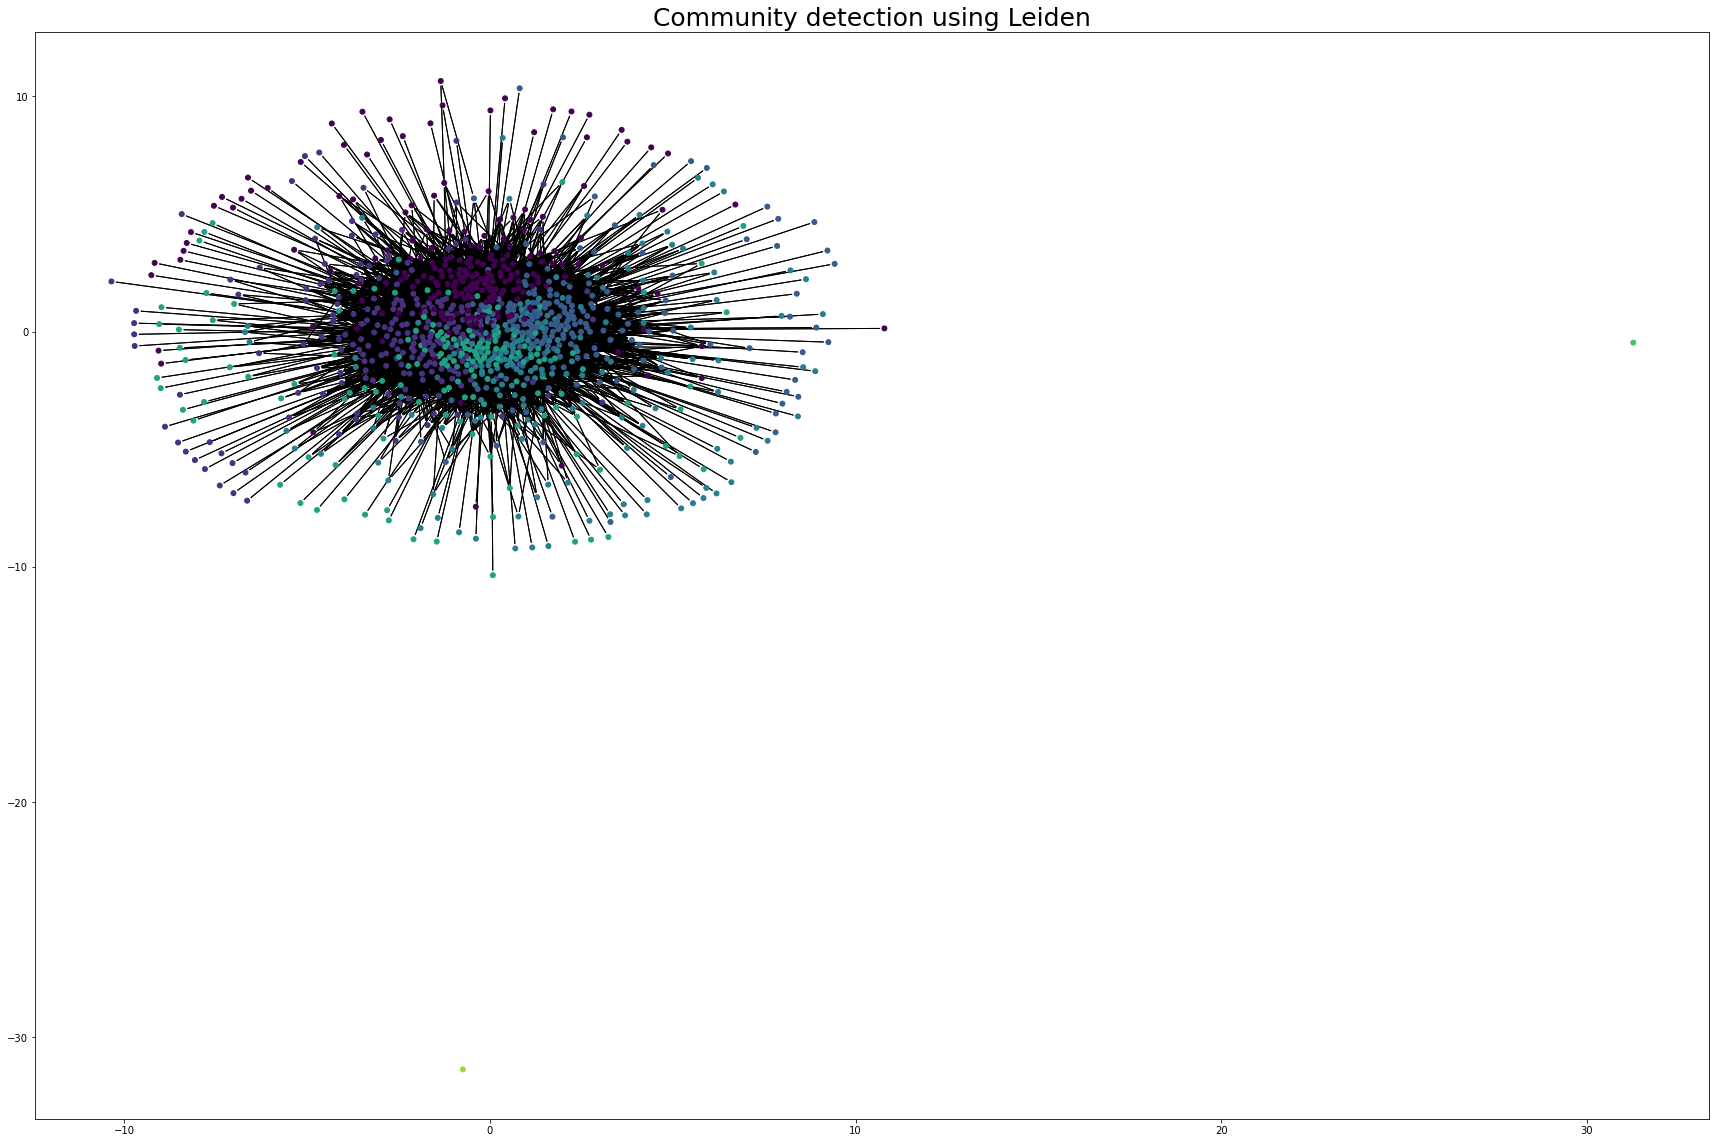

In [141]:
fig, ax = plt.subplots(figsize=(30, 20))
ig.plot(partition, target=ax)
plt.title("Community detection using Leiden", fontdict = {'fontsize' : 25 })
plt.show()